## Module_2: *(Template)*

## Team Members:
*Trey, Karinna*

## Project Title:
*Quantifiying and Predicting Lung Fibrosis Across Tissue Depths*



## Project Goal:
This project seeks to determine how the extent of lung fibrosis changes with depth within a fibrotic lung and to devlop an image analysis method that quantifies fibrosis across lung biopsy images.

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence
    - Annual incidence of IPF in the USA is estimated at 6.8 to 8.8 per 100,000 and up to 16.3 to 17.4 per 100,0000 with a broader definition https://pmc.ncbi.nlm.nih.gov/articles/PMC9487229
    - Incidence rate of IPF was 13.2-26.1/100,000 
    https://journal.chestnet.org/article/S0012-3692(24)02766-1/fulltext
* Risk factors (genetic, lifestyle)
    - Approximately 10-20% of IPF cases are familial
    - There are associated variants in genes like MUC5B, TERT, TERC, surfactant genes, and telomere maintaince genes
    https://emedicine.medscape.com/article/301226-overview
    - Incidence of IPF increases dramatically with age, typically around 50-70 years
    - Men are affected more frequently
    - mdpi.com/1422-0067/22/11/6107
    - Smoking, chronic dustinhalation, and occupational exposures increase risk
    https://www.cdc.gov/mmwr/volumes/74/wr/mm7407a1.htm?
* Symptoms
    -shortness of breath
    - dry cough
    - extreme tiredness
    - unintentional weight loss
    - aching muscles and joints
    - clubbing of toes and fingers
    https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690
* Standard of care treatment(s)
    - Diagnosis involves a multidisciplinary discussion with pulmonologists, radiologists, and pathologists discussing all features of the patient's presentation, radiographic findings, and pathologic findings.
    Treatments
    - Antifibrotic drugs (nintedanib and pirfenidone - https://www.lung.org/lung-health-diseases/lung-disease-lookup/pulmonary-fibrosis/patients/how-is-pulmonary-fibrosis-treated/medications)
    - Pulmonary rehabilitation
    - Oxygen therapy
    - Lung transplantation
    -https://www.aafp.org/family-physician/patient-care/care-resources/respiratory-health/idiopathic-pulmonary-fibrosis.html#diagnosis
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    - IPF mainly affects the lower lobes and outer regions of the lungs, where normal tissue is replaced by scar tissue (https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)
    - The buildup of scar tissue causes lungs to stiffen and lose elasticity, limiting air intake and causing shortness of breath 
    - The disease begins with the lung tissue being damaged and healing incorrectly, causing abnormal buildup of scar tissue.
    - The scarring gets worse over time, even after the intial cause stops, leading to progressive loss of lung function
    - (https://my.clevelandclinic.org/health/diseases/10959-pulmonary-fibrosis)
    - As the disease progresses, the lungs gradually lose their ability to move oxygen into the bloodstream. (https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)



## Data-Set: 
*The dataset analyzed in this project consists of 78 graysclae histological images of bleomycin-induced fibrotic mouse lungs, each captured at different tissue depths ranging from 0-10,000 micrometers. These data were collected by administering bleomycin, a chemotherapeutic antibiotic known to cause IPF, to mice and subsequently, harvesting their lung tissue. The tissue was then sectioned and immunostained for proteins relevant to fibrosis, including desmin, alpha-smooth muscle actin, and CD-31. These stained sections were then imaged using high-resolution Aperio AT2 whole-slide imaging, producing grayscale images in which white regions correspond to fibrotic regions and black regions represent healthy lung tissues. This data-set is from Dr. Peirce-Cottler's lab.



Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 33151
Black pixels in image 1: 4161153

White pixels in image 2: 73224
Black pixels in image 2: 4121080

White pixels in image 3: 48667
Black pixels in image 3: 4145637

White pixels in image 4: 29677
Black pixels in image 4: 4164627

White pixels in image 5: 41943
Black pixels in image 5: 4152361

Percent white px:
\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010022.jpg:
0.7903814315795898% White | Depth: 80 microns

\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010026.jpg:
1.7457962036132812% White | Depth: 2800 microns

\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010032.jpg:
1.1603116989135742% White | Depth: 500

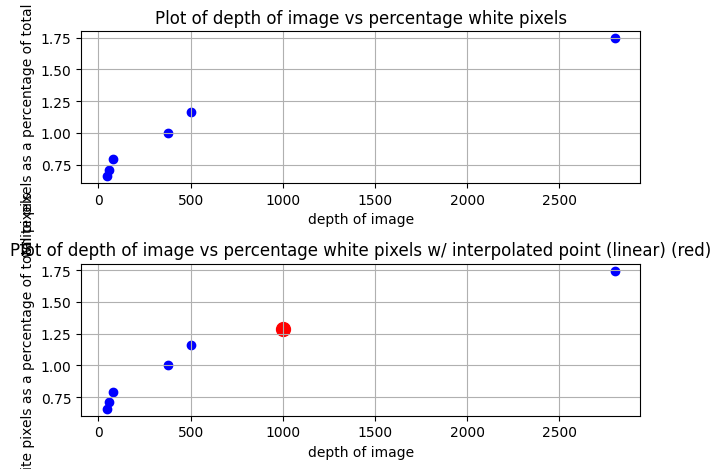

The interpolated point is at the x-coordinate 1000.0 and y-coordinate 1.7468763042010125.


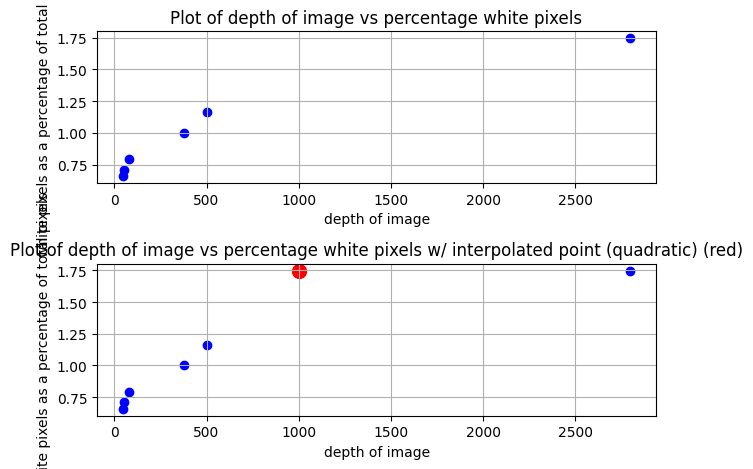

The interpolated point is at the x-coordinate 1000.0 and y-coordinate 3.1154725131043657.


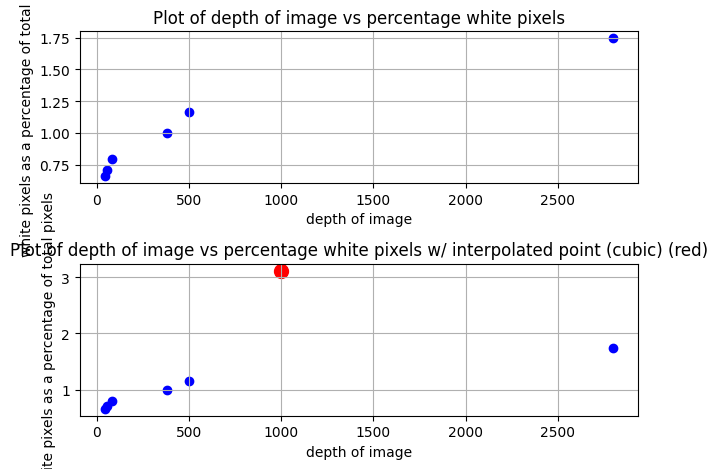

: 

In [ ]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''



from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010017.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010022.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010026.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010032.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010036.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010040.jpg",
   
    
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010017.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010022.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010026.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010032.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010036.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010040.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    45,
    80,
    2800,
    500,
    55,
    380,
]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (linear) (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


i = interp1d(x, y, kind='quadratic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (quadratic) (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

i = interp1d(x, y, kind='cubic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (cubic) (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Verify and validate your analysis: 

In order to verify our results, we first ensured that our image-processing and interpolation outputs were as expected. We then confirmed that each image's total pixels were the same and all calculated white pixel percentages were accurate. The interpolation functions were then validated by testing at a debth of 1000 µm, where the linear model predicted 1.29% white pixels, the quadratic model predicted 1.75%, and the cubic model predicted 3.12%. compared to the actual value of 1.45%, which was found based on the actual image at that debth, shown in the code below. The linear interpolation most closely matched the real data, while the quadratic and cubic predictions overestimated fibrosis. This suggested that the linear model most accurately represented the biological trend. 

To externally validate our method, we compared it to a study done by Gilhodes et al. in 2017, in which an automated image analysis system was creaed for bleomycin-treated mouse lungs. They wrote, "we developed an automated software histological image analysis performed from digital image of entire lung sections," and found that it had "a significant correlation" with standard fibrotic measures. Their findings support the accuracy of using quantitative image-based methods like ours.

- https://pmc.ncbi.nlm.nih.gov/articles/PMC5249201/

Counts of pixel by color in each image
White pixels in image 0: 27561
Black pixels in image 0: 4166743

White pixels in image 1: 33151
Black pixels in image 1: 4161153

White pixels in image 2: 73224
Black pixels in image 2: 4121080

White pixels in image 3: 48667
Black pixels in image 3: 4145637

White pixels in image 4: 29677
Black pixels in image 4: 4164627

White pixels in image 5: 41943
Black pixels in image 5: 4152361

White pixels in image 6: 60715
Black pixels in image 6: 4133589

Percent white px:
\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010017.jpg:
0.6571054458618164% White | Depth: 45 microns

\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010022.jpg:
0.7903814315795898% White | Depth: 80 microns

\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010026.jpg:
1.7457962036132812% White | Depth: 2800 microns

\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK

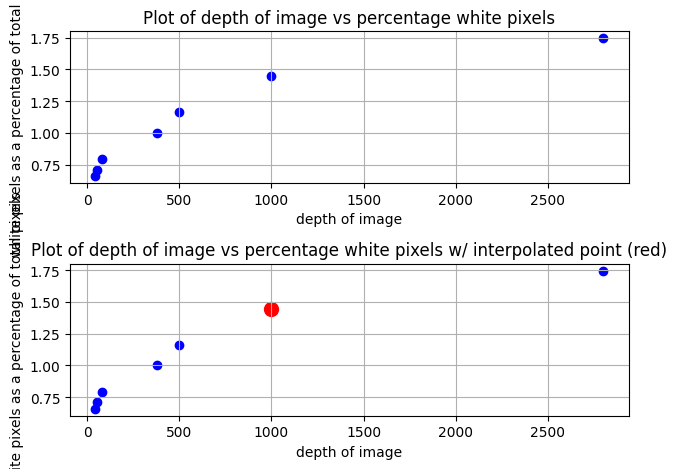

In [4]:
'''Module 2: count black and white pixels in a .jpg and extrapolate points'''



from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010017.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010022.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010026.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010032.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010036.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_Sk658 Llobe ch010040.jpg",
    r"\Users\treyh\OneDrive\Documents\GitHub\BME2315_Module2_Group8\MASK_SK658 Slobe ch010066.jpg" ,
    
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010017.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010022.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010026.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010032.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010036.jpg",
    # r"/Users/karinaarakal/Documents/GitHub/Comp BME - Module 2/MASK_Sk658 Llobe ch010040.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    45,
    80,
    2800,
    500,
    55,
    380,
    1000
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

'''the .csv writing subroutine ends here'''

# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Conclusions and Ethical Implications: 

Our results suggested that fibrosis in bleomycin-treated mouse lungs increasess with tissue debth, meaning deeper lung regionshave more scarring. Of the three interpolation methods tested, at the tested value of 1000 µm, the linear model (1.29%) was the most accurate, closely matching the actual value (1.45%), while the quadratic and cubic models overestimated fibrosis. This supports the idea that a linear image-based analysis provides the most realistic predictions of fibrosis at unmeasured debths.

Ethically, this kind of image-based approach can help reduce the need for additional animal testing by extracting more information from given samples. It could also help improve the diagnosis and treatment for patients with IPF by improving diagnostic accuracy while minimizing patient risk. However, it is important that this system is thoroughly validated, used transparatnly, and evaluated across different datasets to ensure that it is applied appropriately in both research and clinical settings.

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*


A key limitation of this project is the small sample size, as only six lung images were analyzed. This limited the statistical strength of our interpolation models and may not fully represent the variability of fibrosis across the lung. Fibrosis severity may vary significantly between regions or mice, and nanalyzing such a small dataset restricts our ability to capture the biological variabliity. Additionally, our validation step was limited to a single interpolated depth, so model accuracy was only confirmed at one point. This limits the confidence in how well each interpolation model performs.

Future work should expand the analysis to include all 78 lung images to improve model accuracy and increase statistical reliability. There is also the potential for an incorporation of machine learning, which could improve the consistency and help make predictions of lung fibrosis. Beyond computational improvements, future studies should also seek to compare image-based fibrosis quantification from mice with imgaging data from human lung biopsies. This would help to assess the clinical relevance of interpolation models and evaluate how well the mice models reflect human pathophysiology. Finally, exploring the relationship between angiogenesis and fibrosis could reveal key mechanisms and growth factors driving disease progression and identify posssible therapeutic targets.

## NOTES FROM YOUR TEAM: 
10/2/2025
- learned about lung fibrosis and basis of Dr. Peirce-Cottler's research

10/3/2025
- completed the part of code that determines percent pixels of the 6 picked images

10/7/2025
- lecture on interpolation

10/8/2025
- worked on disease background, project goal, and describing the dataset

10/9/2025
- worked on interpolation for different degrees (linear, quadratic, cubic)

10/13
- created presentation and started working on it

10/15
- performed verification method of comparing to actual value
- completed verification and validation, conclusions and ethical implications, and limitations and future work sections.
- completed the background info session
- finished presentation

## QUESTIONS FOR YOUR TA: 
Not sure about sources for the data-set, not sure if the submission appears correctly 

Counts of pixel by color in each image
White pixels in image 0: 0
Black pixels in image 0: 0

White pixels in image 1: 0
Black pixels in image 1: 0

White pixels in image 2: 0
Black pixels in image 2: 0

White pixels in image 3: 0
Black pixels in image 3: 0

White pixels in image 4: 0
Black pixels in image 4: 0

White pixels in image 5: 0
Black pixels in image 5: 0

Percent white px:
//MASK_Sk658 Llobe ch010017.jpg:
nan% White | Depth: 45 microns

//MASK_Sk658 Llobe ch010022.jpg:
nan% White | Depth: 80 microns

//MASK_Sk658 Llobe ch010026.jpg:
nan% White | Depth: 2800 microns

//MASK_Sk658 Llobe ch010032.jpg:
nan% White | Depth: 500 microns

//MASK_Sk658 Llobe ch010036.jpg:
nan% White | Depth: 55 microns

//MASK_Sk658 Llobe ch010040.jpg:
nan% White | Depth: 380 microns

CSV file 'Percent_White_Pixels.csv' has been created.


C:\Users\treyh\AppData\Local\Temp\ipykernel_37332\2722077866.py:69: RuntimeWarning: invalid value encountered in scalar divide
  white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))


The interpolated point is at the x-coordinate 1000.0 and y-coordinate nan.


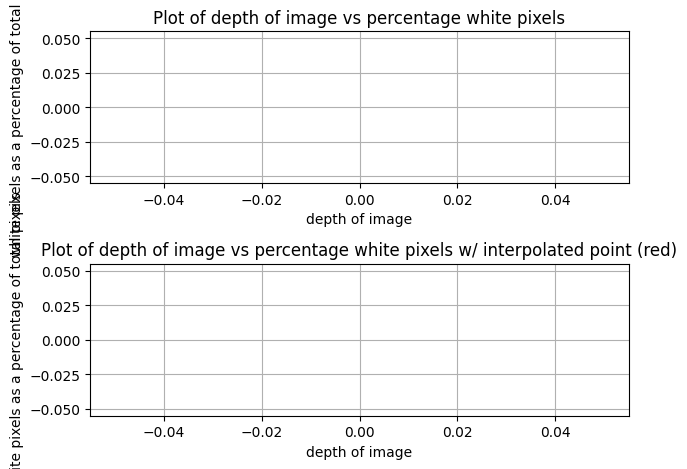